# Shared Birthday Challenge: Example Code

This is an example of addressing the Shared Birthday Challenge using Python to simulate the problem. It is written in a [JupyterLab Notebook](https://jupyterlab.readthedocs.io/en/stable/).

We start off by declaring some imports:

In [1]:
# initial imports
from collections import Counter
from random import randint

import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

import numpy as np

## Core Functions

We start by defining a   function `find_a_match()` which uses `randint()` to randomly pick a 'day' numbered between 1 and 365. Once selected, the day is placed in the list `so_far`. The function keeps on doing this until the day it has just picked matches an item that is already in `so_far`. The function returns an integer `count` which is the number of days it had to select before getting a match.

In [2]:
def find_a_match(verbose=False):
    """
    Counts the number of times needed to randomly select a value from [1,365] until we matched a previous selection.
    
    Returns:
        An int representing how many random selections were required before getting a match.
    """
    repeat = True
    so_far = []
    while repeat:
        day = randint(1, 365)  # pick a random day of the year
        if day in so_far:  # if True, we have a match
            count = (
                len(so_far) + 1
            )  # we add 1 to the count because it doesn't yet contain the new day
            if verbose:
                print("Days: {} + {}\nCount of picks: {}".format(so_far, day, count))
            repeat = False
        else:
            so_far.append(day)
    return count

By the law of large numbers, we need to run `find_a_match()` a fair number of times to get a reasonable simulation. This is what `run_experiment()` does. It allows you to specify how many times to run the simulation and returns a list `counts` consisting of the output of each execution of `find_a_match()`.

In [3]:
def run_experiment(n=1000):
    """
    Run the find_a_match() = function n times and add the result to the list counts.
    
    Argument:
        n: An int which determines the number of times to run the experiment.
    
    Returns:
        A list of int where each item is a count returned by find_a_match().
    """
    counts = []
    for i in range(n):
        count = find_a_match()
        counts.append(count)
    return counts

Here's an example of the output from executing `run_experiment()` 100 times.

In [4]:
print(run_experiment(100))

[49, 27, 11, 32, 37, 17, 7, 18, 29, 42, 47, 45, 10, 25, 23, 22, 26, 30, 17, 36, 38, 14, 48, 5, 19, 14, 43, 21, 17, 16, 41, 23, 45, 34, 17, 21, 26, 14, 49, 19, 13, 33, 7, 23, 14, 24, 38, 17, 27, 18, 11, 23, 48, 26, 30, 28, 42, 10, 20, 17, 21, 49, 13, 37, 39, 9, 44, 50, 16, 5, 39, 15, 32, 30, 12, 12, 19, 7, 46, 21, 14, 17, 10, 8, 14, 45, 57, 33, 14, 26, 16, 25, 13, 27, 32, 30, 18, 22, 37, 5]


Let's do it a million times and store the result in the variable `counts`. We use `%%time` to monitor how long this takes. This is sometimes worth knowing since obviously the execution time will rise as we increase the number of times we run the experiment.

In [5]:
%%time

counts = run_experiment(1000000)

CPU times: user 41 s, sys: 336 ms, total: 41.3 s
Wall time: 42.1 s


## Plotting the results

Now let's put those counts into a histogram with 100 bins. The histogram is plotted with the `hist()` method from [Matplotlib](https://matplotlib.org).

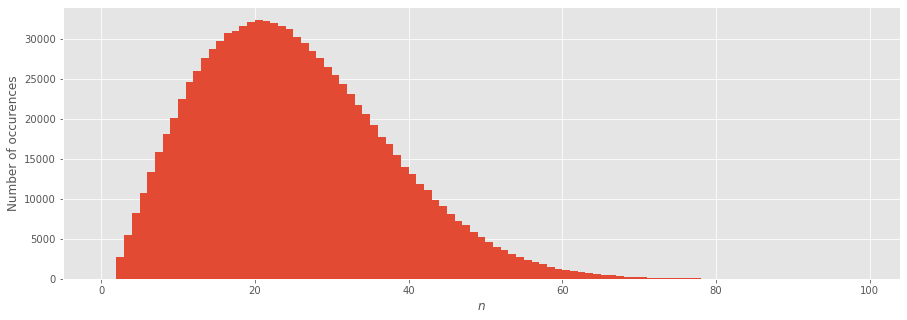

In [6]:
fig = plt.figure(figsize=(15, 5))
plt.xlabel("$n$")
plt.ylabel("Number of occurences")
counts_histogram = plt.hist(counts, bins=np.arange(0, 100))
plt.show()

**Question**: What happens if you change the number of times that you run your experiment to, say 1000 or 100?

The histogram `counts_histogram` just shows the number of times that each `count` of people required before we got a matching birthday. For example, we can check how many times we needed 15 people before we got a match.

In [7]:
counts_histogram[0][15]

29648.0

In order to turn these counts into probabilities, we need to divide them by the total number of times we ran our experiment, that is, by one million. The `matplotlib` histogram can do this for us if we add the keyword `density` in the argument list of `hist()`, as shown below.

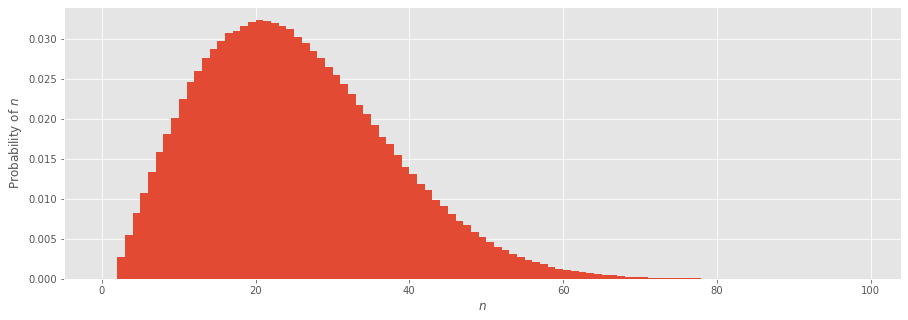

In [8]:
fig = plt.figure(figsize=(15, 5))
plt.xlabel("$n$")
plt.ylabel("Probability of $n$")
approx_dist = plt.hist(counts, bins=np.arange(0, 100), density=True)
plt.show()

We can now add up these probabilities to figure out how many people we need to see to get say a 50% chance of finding matched birthdays. The numpy `cumsum()` function  gives us an easy way to get this sum.

In [9]:
print(
    "50% of time, no more than {} people were needed for a repeat.".format(
        np.where(np.cumsum(approx_dist[0]) > 0.5)[0][0]
    )
)

50% of time, no more than 23 people were needed for a repeat.


## Credits

Many thanks to Chris Ferrie's article [The power of simulation: birthday paradox](https://csferrie.com/2017/03/23/the-power-of-simulation-birthday-paradox/) for the conceptual framework and for the plotting code.